# Predict Solar Power Generation

In [4]:
import tensorflow as tf
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [5]:
def load_data():
    pv_irr  = loadmat('24DaysPVnIrr.mat')
    
    pv = pv_irr['PV']
    irr = pv_irr['Irr']
    pv = pv.T.reshape(-1,1)
    irr = irr.T.reshape(-1,1)
  
    scaler = MinMaxScaler() 
    pv = scaler.fit_transform(pv)
    irr = scaler.fit_transform(irr)
    all_data = np.hstack((pv,irr))

    return all_data[::300] # five minutes sequence data

In [6]:
# prepare a windowed data set to pass into the model
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [7]:
# forecasting
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

<Figure size 432x288 with 0 Axes>

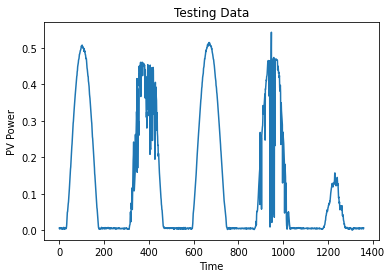

<Figure size 432x288 with 0 Axes>

In [8]:
all_data = load_data()
window_size = 60
batch_size = 60
shuffle_buffer_size = len(all_data)
pv = all_data[:,0]
split = int(len(pv)*0.8)
x_train = pv[:split]
x_valid = pv[split:]
plt.plot(x_valid)
plt.title('Testing Data')
plt.xlabel("Time")
plt.ylabel("PV Power")
plt.figure()

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9),  metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
90/90 [==============================] - 21s 114ms/step - loss: 0.0063 - mae: 0.0840
Epoch 2/500
90/90 [==============================] - 9s 83ms/step - loss: 0.0036 - mae: 0.0638
Epoch 3/500
90/90 [==============================] - 12s 103ms/step - loss: 0.0022 - mae: 0.0456
Epoch 4/500
90/90 [==============================] - 10s 93ms/step - loss: 0.0019 - mae: 0.0381
Epoch 5/500
90/90 [==============================] - 10s 88ms/step - loss: 0.0018 - mae: 0.0355
Epoch 6/500
90/90 [==============================] - 10s 93ms/step - loss: 0.0017 - mae: 0.0344
Epoch 7/500
90/90 [==============================] - 9s 88ms/step - loss: 0.0016 - mae: 0.0338
Epoch 8/500
90/90 [==============================] - 13s 123ms/step - loss: 0.0016 - mae: 0.0330
Epoch 9/500
90/90 [==============================] - 10s 94ms/step - loss: 0.0015 - mae: 0.0323
Epoch 10/500
90/90 [==============================] - 11s 107ms/step - loss: 0.0015 - mae: 0.0316
Epoch 11/500
90/90 [=================

90/90 [==============================] - 11s 92ms/step - loss: 7.3093e-04 - mae: 0.0179
Epoch 83/500
90/90 [==============================] - 10s 92ms/step - loss: 7.2871e-04 - mae: 0.0179
Epoch 84/500
90/90 [==============================] - 10s 92ms/step - loss: 7.2623e-04 - mae: 0.0178
Epoch 85/500
90/90 [==============================] - 9s 79ms/step - loss: 7.2416e-04 - mae: 0.0178
Epoch 86/500
90/90 [==============================] - 10s 98ms/step - loss: 7.2206e-04 - mae: 0.0178 1s - loss: 7.1765e-0
Epoch 87/500
90/90 [==============================] - 9s 89ms/step - loss: 7.1985e-04 - mae: 0.0178
Epoch 88/500
90/90 [==============================] - 8s 83ms/step - loss: 7.1767e-04 - mae: 0.0177
Epoch 89/500
90/90 [==============================] - 9s 92ms/step - loss: 7.1511e-04 - mae: 0.0176
Epoch 90/500
90/90 [==============================] - 9s 90ms/step - loss: 7.1306e-04 - mae: 0.0176
Epoch 91/500
90/90 [==============================] - 10s 81ms/step - loss: 7.1061e-04 -

90/90 [==============================] - 9s 94ms/step - loss: 6.0400e-04 - mae: 0.0150: 5s - loss: 5.9259e-04 - mae: 0.01 - ETA: 5s - l - ETA: 2s - los
Epoch 159/500
90/90 [==============================] - 10s 99ms/step - loss: 6.0277e-04 - mae: 0.0150
Epoch 160/500
90/90 [==============================] - 11s 98ms/step - loss: 6.0172e-04 - mae: 0.0150
Epoch 161/500
90/90 [==============================] - 10s 98ms/step - loss: 6.0053e-04 - mae: 0.0149
Epoch 162/500
90/90 [==============================] - 9s 82ms/step - loss: 5.9945e-04 - mae: 0.0149
Epoch 163/500
90/90 [==============================] - 10s 94ms/step - loss: 5.9814e-04 - mae: 0.0149
Epoch 164/500
90/90 [==============================] - 10s 95ms/step - loss: 5.9707e-04 - mae: 0.0149 0s - loss: 6.0495e-04 - mae
Epoch 165/500
90/90 [==============================] - 10s 96ms/step - loss: 5.9596e-04 - mae: 0.0148: 8s - loss: 6.0269e-04  - ETA: 7s - lo - ETA: 0s - loss: 5.9682e-04 - mae: 0.0
Epoch 166/500
90/90 [=======

90/90 [==============================] - 1498s 17s/step - loss: 5.3113e-04 - mae: 0.0135
Epoch 238/500
90/90 [==============================] - 10s 91ms/step - loss: 5.3052e-04 - mae: 0.0135
Epoch 239/500
90/90 [==============================] - 8s 84ms/step - loss: 5.2968e-04 - mae: 0.0135
Epoch 240/500
90/90 [==============================] - 8s 75ms/step - loss: 5.2905e-04 - mae: 0.0135
Epoch 241/500
90/90 [==============================] - 9s 83ms/step - loss: 5.2851e-04 - mae: 0.0135
Epoch 242/500
90/90 [==============================] - 8s 74ms/step - loss: 5.2754e-04 - mae: 0.0134
Epoch 243/500
90/90 [==============================] - 7s 67ms/step - loss: 5.2677e-04 - mae: 0.0134: 1s - loss:
Epoch 244/500
90/90 [==============================] - 7s 65ms/step - loss: 5.2615e-04 - mae: 0.0134
Epoch 245/500
90/90 [==============================] - 7s 66ms/step - loss: 5.2544e-04 - mae: 0.0134
Epoch 246/500
90/90 [==============================] - 7s 66ms/step - loss: 5.2464e-04 - m

90/90 [==============================] - 7s 68ms/step - loss: 4.8285e-04 - mae: 0.0126
Epoch 318/500
90/90 [==============================] - 8s 69ms/step - loss: 4.8236e-04 - mae: 0.0126
Epoch 319/500
90/90 [==============================] - 7s 69ms/step - loss: 4.8200e-04 - mae: 0.0126
Epoch 320/500
90/90 [==============================] - 9s 68ms/step - loss: 4.8144e-04 - mae: 0.0126
Epoch 321/500
90/90 [==============================] - 7s 68ms/step - loss: 4.8099e-04 - mae: 0.0126
Epoch 322/500
90/90 [==============================] - 7s 69ms/step - loss: 4.8064e-04 - mae: 0.0126
Epoch 323/500
90/90 [==============================] - 9s 68ms/step - loss: 4.8010e-04 - mae: 0.0126
Epoch 324/500
90/90 [==============================] - 8s 68ms/step - loss: 4.7960e-04 - mae: 0.0126
Epoch 325/500
90/90 [==============================] - 7s 68ms/step - loss: 4.7915e-04 - mae: 0.0125
Epoch 326/500
90/90 [==============================] - 8s 69ms/step - loss: 4.7865e-04 - mae: 0.0125
Epoc

90/90 [==============================] - 8s 79ms/step - loss: 4.5209e-04 - mae: 0.0120
Epoch 397/500
90/90 [==============================] - 7s 70ms/step - loss: 4.5193e-04 - mae: 0.0120
Epoch 398/500
90/90 [==============================] - 7s 70ms/step - loss: 4.5139e-04 - mae: 0.0120
Epoch 399/500
90/90 [==============================] - 7s 70ms/step - loss: 4.5110e-04 - mae: 0.0120
Epoch 400/500
90/90 [==============================] - 8s 83ms/step - loss: 4.5092e-04 - mae: 0.0120
Epoch 401/500
90/90 [==============================] - 9s 96ms/step - loss: 4.5046e-04 - mae: 0.0120
Epoch 402/500
90/90 [==============================] - 8s 82ms/step - loss: 4.5013e-04 - mae: 0.0120
Epoch 403/500
90/90 [==============================] - 8s 80ms/step - loss: 4.4979e-04 - mae: 0.0120
Epoch 404/500
90/90 [==============================] - 9s 95ms/step - loss: 4.4946e-04 - mae: 0.0119
Epoch 405/500
90/90 [==============================] - 9s 89ms/step - loss: 4.4917e-04 - mae: 0.0120: 2
E

90/90 [==============================] - 9s 93ms/step - loss: 4.2920e-04 - mae: 0.0116
Epoch 476/500
90/90 [==============================] - 10s 103ms/step - loss: 4.2896e-04 - mae: 0.01151s - loss: 4.217
Epoch 477/500
90/90 [==============================] - 10s 101ms/step - loss: 4.2869e-04 - mae: 0.0115
Epoch 478/500
90/90 [==============================] - 9s 93ms/step - loss: 4.2834e-04 - mae: 0.0115: 2s - 
Epoch 479/500
90/90 [==============================] - 9s 88ms/step - loss: 4.2805e-04 - mae: 0.0115
Epoch 480/500
90/90 [==============================] - 9s 94ms/step - loss: 4.2785e-04 - mae: 0.0115
Epoch 481/500
90/90 [==============================] - 9s 94ms/step - loss: 4.2754e-04 - mae: 0.0115
Epoch 482/500
90/90 [==============================] - 8s 84ms/step - loss: 4.2731e-04 - mae: 0.0115
Epoch 483/500
90/90 [==============================] - 11s 110ms/step - loss: 4.2707e-04 - mae: 0.0115
Epoch 484/500
90/90 [==============================] - 10s 105ms/step - loss

In [11]:
rnn_forecast = model_forecast(model, pv[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split - window_size:-1, -1, 0]

<Figure size 432x288 with 0 Axes>

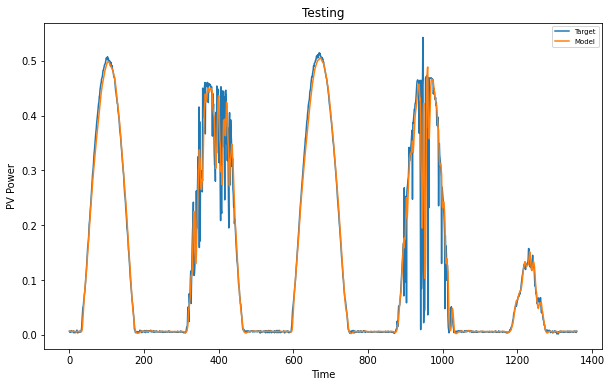

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 6))
time = np.arange(len(x_valid))
plt.plot(x_valid, label="Target")
plt.plot(time,rnn_forecast, label= "Model")
plt.title('Testing')
plt.xlabel("Time")
plt.ylabel("PV Power")
plt.legend(fontsize='x-small')
plt.figure()

In [13]:
tf.keras.metrics.mean_absolute_percentage_error(x_valid, rnn_forecast).numpy()

25.05888

<Figure size 432x288 with 0 Axes>

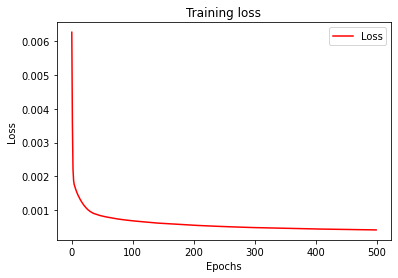

<Figure size 432x288 with 0 Axes>

In [14]:
loss=history.history['loss']
epochs=range(len(loss))
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()